In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from scipy import stats
from statsmodels.formula.api import ols
from scipy.stats import norm
from sklearn.metrics import r2_score
from numpy import mean
from scipy.stats import norm

# 1.
## Primer statistickog zakljucivanja na osnovu preuzetih podataka iz Trending YouTube Video Statistics
#link: https://www.kaggle.com/datasnaek/youtube-new
#skinuo sam samo DEvideos i GBvideos na njima sam radio.

In [2]:
df=pd.read_csv('DEvideos.csv') #ucitavanje csv datoteke iz Nemacke
df.head()

video_id trending_date  \
0  LgVi6y5QIjM      17.14.11   
1  Bayt7uQith4      17.14.11   
2  1ZAPwfrtAFY      17.14.11   
3  AHtypnRk7JE      17.14.11   
4  ZJ9We4bjcg0      17.14.11   

                                               title            channel_title  \
0  Sing zu Ende! | Gesangseinlagen vom Feinsten |...                inscope21   
1  Kinder ferngesteuert im Kiosk! Erwachsene abzo...  LUKE! Die Woche und ich   
2  The Trump Presidency: Last Week Tonight with J...          LastWeekTonight   
3                                Das Fermi-Paradoxon        100SekundenPhysik   
4           18 SONGS mit Kelly MissesVlog (Sing-off)                     rezo   

   category_id              publish_time  \
0           24  2017-11-13T17:08:49.000Z   
1           23  2017-11-12T22:30:01.000Z   
2           24  2017-11-13T07:30:00.000Z   
3           27  2017-11-12T15:00:01.000Z   
4           24  2017-11-12T13:10:36.000Z   

                                                tags    views   likes  \
0  inscope21|"sing zu ende"|"gesangseinlagen"|"ge...   252786   35885   
1  Kinder|"ferngesteuert"|"Kinder ferngesteuert"|...   797196   53576   
2  last week tonight trump presidency|"last week ...  2418783   97190   
3  Physik|"Wissenschaft"|"Technik"|"Science-Ficti...   380247   31821   
4  kelly|"missesvlog"|"kelly song"|"bausa"|"bausa...   822213  100684   

   dislikes  comment_count                                  thumbnail_link  \
0       230           1539  https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg   
1       302           1278  https://i.ytimg.com/vi/Bayt7uQith4/default.jpg   
2      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
3       458           1955  https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg   
4      2467          10244  https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  Heute gibt es mal wieder ein neues Format... w...  
1  Kinder ferngesteuert! Kinder lassen sich sooo ...  
2  One year after the presidential election, John...  
3  ►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...  
4  18 Song Mashup über den (veränderten) Beat von...

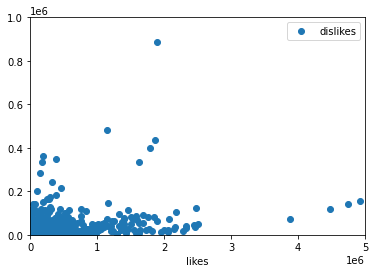

In [103]:
# plotovanje
df.plot('likes', 'dislikes', style='o')
plt.xlim([0,5000000]) #granice za vrednosti like-a i dislike-a
plt.ylim([0,1000000]) #Ако prosledimo argumente u x i y metodama, oni postavljaju ogranicenja za odgovarajuce ose
plt.show()

In [104]:
# Rezime regresije:
Rez1= sm.ols('likes ~ dislikes', df).fit()
Rez2 = sm.ols('likes ~ dislikes', df[:-1]).fit()
print(Rez1.summary())
print(Rez2.summary())

                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                 1.097e+04
Date:                Mon, 14 Jun 2021   Prob (F-statistic):               0.00
Time:                        15:16:32   Log-Likelihood:            -5.2401e+05
No. Observations:               40840   AIC:                         1.048e+06
Df Residuals:                   40838   BIC:                         1.048e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.739e+04    449.279     38.696      0.0

In [28]:
#---------------------------------------------------------------------
#Ovde cemo raditi Polinomsku regresiju Komentara i Gledanosti
df['P2']=df['comment_count']+(df['views'])**3

<ipython-input-50-17c7ee6eac98>:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w1 = np.linalg.lstsq(A.T,y)[0] #koristio sam linalg lstsq za vracanje resenja najmanjih kvadrata linearno matricne jednacine


w1= [-3.78396116e+02  5.24355745e-03]


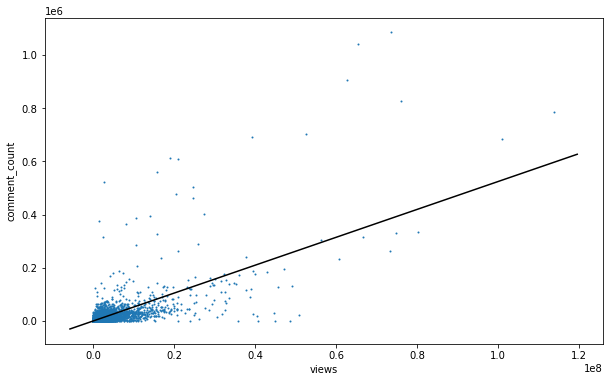

In [50]:
A=np.array(df['views'])
A=np.array([np.ones(len(A)),A]) # vraca novi niz datog oblika i tipa, sa jedinicama
y=np.array(df['comment_count'])

w1 = np.linalg.lstsq(A.T,y)[0] #koristio sam linalg lstsq za vracanje resenja najmanjih kvadrata linearno matricne jednacine
print('w1=',w1)               #Т pristupa atributu Т objekta, a to je numpy niz. 
def f(x,w):
    return w[0]+w[1]*x

ax=df.plot(kind='scatter',s=1,x='views',y='comment_count',figsize=[10,6])
x0,x1=plt.xlim()
ax.plot([x0,x1],[f(x0,w1),f(x1,w1)],'k')
plt.show()

In [51]:
#Visestruka regresija
model1 = ols("likes ~ dislikes", df).fit()  # model nezavisan od godine
print(model1.summary()) # x je slucajan vektor,x je nezavisna promenljiva,a y je zavisna

                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                 1.097e+04
Date:                Mon, 14 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:07:37   Log-Likelihood:            -5.2401e+05
No. Observations:               40840   AIC:                         1.048e+06
Df Residuals:                   40838   BIC:                         1.048e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.739e+04    449.279     38.696      0.0

In [81]:
#Bezuslovna Verovatnoca za brojanje likova
atributi = ['likes','comments_disabled']
data_por = pd.read_csv("DEvideos.csv",usecols=atributi)
data_temp = data_por["likes"].value_counts()

In [82]:
#Koliko likova ima izmedju 10000 i 50000
data_temp = ((data_por["likes"]>=10000) & (data_por["likes"]<=50000)).value_counts() 
br_srednjih=data_temp[True]
br_srednjih

7934

In [83]:
#Koliko likova ima da su preko 50000
data_temp = (data_por["likes"]>50000).value_counts()
br_visokih=data_temp[True]
br_visokih

3300

In [84]:
#Koliko likova ima da su ispod 10000
data_temp = (data_por["likes"]<10000).value_counts()
br_niskih=data_temp[True]
br_niskih

29606

In [85]:
#Ukupan broj likova
print(br_visokih+br_srednjih+br_niskih)

40840


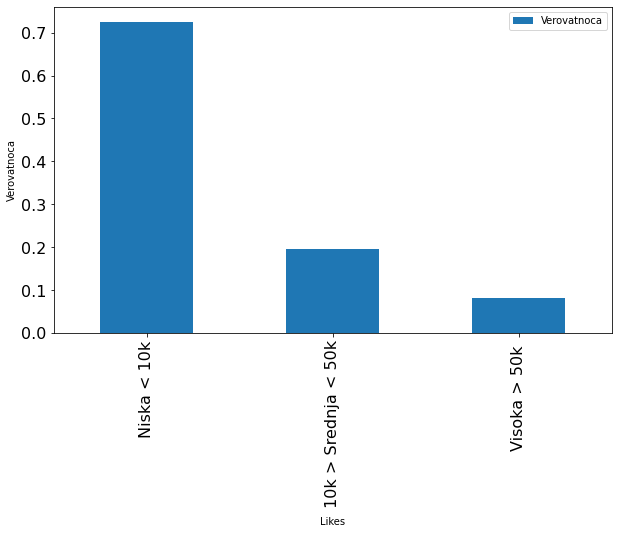

                      Verovatnoca
Niska < 10k              0.724927
 10k > Srednja < 50k     0.194270
Visoka > 50k             0.080803


In [86]:
P_ocene = pd.DataFrame([br_niskih, br_srednjih, br_visokih]/(br_visokih+br_srednjih+br_niskih))
P_ocene.index = ["Niska < 10k"," 10k > Srednja < 50k","Visoka > 50k "]
P_ocene.columns = ["Verovatnoca"]
# Crtanje bar grafika:
P_ocene.plot.bar(figsize=(10,6),fontsize=16)
plt.xlabel("Likes",fontsize=10)
plt.ylabel("Verovatnoca",fontsize=10)
plt.show()
print(P_ocene)

In [87]:
#Uslovna verovatnoca za videoklipove koji imaju vise od 100000 dal ce imati disabled komentare
data_temp = data_por.loc[data_por["likes"]>100000,"comments_disabled"]
data_temp=data_temp.value_counts()#serija brojeva jedinstvenih vrednosti
data_temp

False    1806
True        3
Name: comments_disabled, dtype: int64

In [88]:
data_temp1 = data_por["comments_disabled"].value_counts() #brojne vrednosti onemogucenih komentara
data_temp1

False    39796
True      1044
Name: comments_disabled, dtype: int64

In [89]:
P_uslovna = pd.DataFrame(data_temp/data_temp1) #Uslovna verovatnoca
P_uslovna.index = ["TRUE","FALSE"]
P_uslovna.columns = ["Uslovna verovatnoca"]
P_uslovna.head()

Uslovna verovatnoca
TRUE              0.045381
FALSE             0.002874

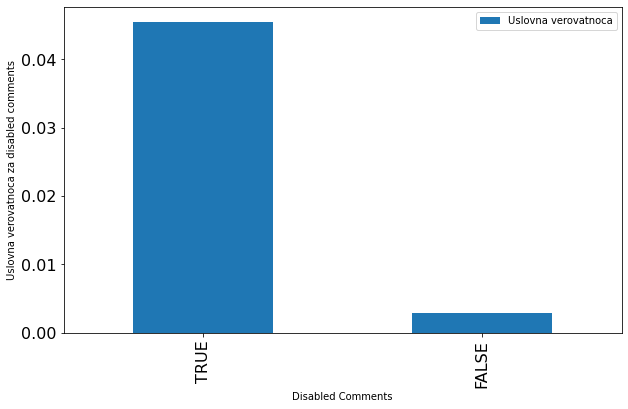

In [61]:
P_uslovna.plot.bar(figsize=(10,6),fontsize=16)
plt.xlabel("Disabled Comments",fontsize=10)
plt.ylabel("Uslovna verovatnoca za disabled comments",fontsize=10)
plt.show()

In [90]:
#Histogram sa Gausom
atributi = ['likes']
df = pd.read_csv("DEvideos.csv",usecols=atributi)
df.head()

likes
0   35885
1   53576
2   97190
3   31821
4  100684

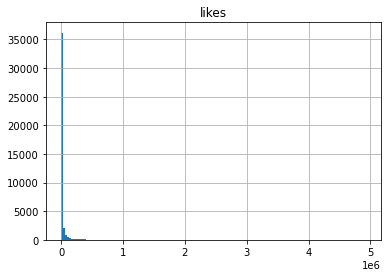

In [91]:
hist = df.hist(bins=150) 
plt.show()

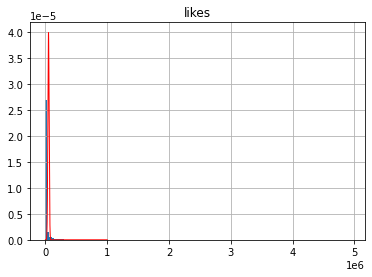

In [92]:
#Srednja vrednost
hist = df.hist(density=True,bins=150)
korak=0.1
x = np.arange(0, 1000000, korak)
m=50000
sig=10000
P_norm = norm.pdf(x, m, sig)

plt.plot(x, P_norm, 'r', linewidth=1.0)
plt.show()

In [93]:
#---------------------------------------------------------------------------------
#Uvodjenje podataka za komentare iz GB i DE i radjenje matematičko očekivanje,varijansa, standardna devijacija, medijana, kvartili, kvantili
attrib = ["comment_count"]
df_temp = pd.read_csv('GBvideos.csv', usecols=attrib) #ucitava samo podatke o komentarima iz GBvideos
df_hum = pd.read_csv('DEvideos.csv', usecols=attrib) #ucitava samo podatke o komentarima iz DEvideos

In [94]:
df = pd.concat([df_temp, df_hum], axis=1) # axis izracunava srednju vrednost kolona
df.columns = ["GBcomments", "DEcomments"]
df.head()

GBcomments  DEcomments
0      9479.0        1539
1      2757.0        1278
2    125882.0       12703
3        37.0        1955
4        30.0       10244

In [95]:
df.dropna().describe() #koristio sam dropna za uklanjanje vrednosti iz kolona da nam ne prikazuje kolone gde je vrednost 0, 
                       #descripe daje srednju vrednodti i meru statisticke disperzije.

GBcomments    DEcomments
count  3.891600e+04  3.891600e+04
mean   1.308835e+04  2.739177e+03
std    5.066740e+04  1.756162e+04
min    0.000000e+00  0.000000e+00
25%    6.790000e+02  7.500000e+01
50%    2.478000e+03  3.610000e+02
75%    9.241500e+03  1.345000e+03
max    1.626501e+06  1.084435e+06

In [96]:
df.quantile(1) #Quantile

GBcomments    1626501.0
DEcomments    1084435.0
Name: 1, dtype: float64

In [97]:
df.cov()['GBcomments']['DEcomments']/(df.std()['GBcomments']*df.std()['DEcomments']) #Correlation coef

-0.0005954161436328826

In [98]:
df.corr()

GBcomments  DEcomments
GBcomments    1.000000   -0.000592
DEcomments   -0.000592    1.000000

In [99]:
#-------------------------------------------------
#Estimacija parametara združenih raspodela (kovarijansa i koeficijent korelacije)
alpha = 0.01 # nivo poverenja je 1-alpha=0.99
order=1-alpha/2
sample_size = 2000 #Sample size sam stavio broj uzoraka 2000 posto trebalo bi da bude oko 40000 uzoraka ali to je previse i nepotrebno dugo ocitavanje
Quant = stats.t.ppf(order, df=sample_size-1) #Quant-kolicina podataka,df=sample_size-1 je broj uzoraka-1 interval poverenja
sample_of_means = [] #uzorci prosecnih vrednosti date liste brojeva


CIs = []
for i in range(100):
    
    generated_sample=df['GBcomments'].sample(sample_size)  
    sample_of_means.append(generated_sample.mean())
    
    margin = Quant * (generated_sample.std()/sample_size**0.5)
    CI_MO = (generated_sample.mean() - margin, generated_sample.mean() + margin)
    CIs.append(CI_MO)
    
print(df['GBcomments'].mean()) # Funkcija mean () se moze koristi za izracunavanje srednje / prosecne vrednosti date liste brojeva. 
                               #Vraca sredinu skupa podataka prosledjenih kao parametri. Aritmeticka sredina je zbir podataka podeljen brojem tacaka podataka. ... 
                               #U Python-u to obicno radimo tako sto zbroj zadatih brojeva delimo brojem prisutnog broja. 
CIs

13088.353145235893


[(10592.55695239629, 17323.02519983468),
 (9653.115851376097, 15526.969098807436),
 (9678.446255615161, 13431.76454669213),
 (11237.214316687285, 16285.082134252174),
 (10020.282241910623, 15922.117758089378),
 (11837.139899952295, 20210.991555446766),
 (9921.50268175203, 15058.399320355453),
 (12357.220999803307, 20585.78684128399),
 (10565.973271029014, 15308.62526911697),
 (9641.190084304404, 15347.875326475294),
 (11103.233451784163, 19570.4943897174),
 (10266.661890326142, 14931.452305587949),
 (10441.252418854923, 18501.964379045337),
 (10435.297326532693, 15366.611046295113),
 (11714.837925128704, 17593.265232766033),
 (10734.473013812583, 15547.457876239774),
 (10961.141440093179, 16452.420175009076),
 (8805.164066722955, 13060.166459592834),
 (11032.535645382684, 17684.286043876964),
 (10966.898884245617, 17761.41368175227),
 (10241.022039857246, 15234.820121159704),
 (10044.44058165716, 13972.00664927283),
 (10886.570114602124, 18280.724616748947),
 (9623.835233587924, 13582.

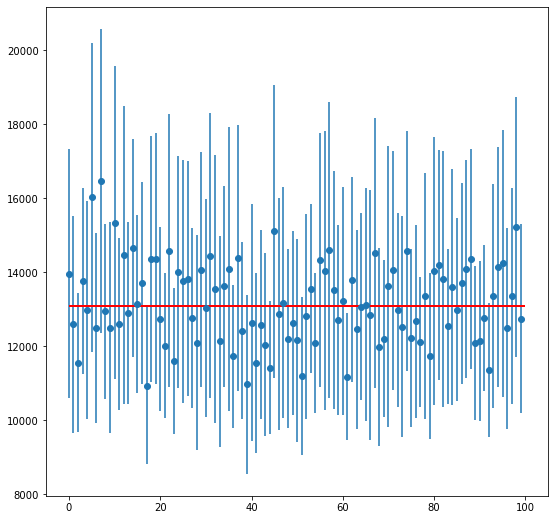

In [100]:
plt.figure(figsize=(9,9))

plt.errorbar(x=np.arange(0, 100), # crtamo intervale pomocu plt.errorbar
             y=sample_of_means[0:100], # specificiramo x i y za tacke
             yerr=[(up-down)/2 for up,down in CIs], #specificiramo gornju i donju granicu
             fmt='o')

plt.hlines(xmin=0, xmax=100,
           y=df.mean()['GBcomments'], 
           linewidth=2.0,
           color="red")

plt.show()